# NORMALIZATION

In [56]:
import pandas as pd
import scipy as sci
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy.matlib
%matplotlib inline

In [17]:
raw_df= pd.read_csv("cricketers.csv", sep='\t')
raw_df.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [32]:
df = raw_df.drop(['PLAYER'],axis=1)
df.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [28]:
columns = df.columns

In [19]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
## Normalizing the attributes on the scale of 0 to 1
normArray = scaler.transform(df)
normArray

array([[0.58823529, 0.52941176, 0.18231293, ..., 0.        , 0.        ,
        0.        ],
       [0.70588235, 0.64705882, 0.65306122, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.08571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.53009259,
        0.63030303],
       [0.        , 0.        , 0.        , ..., 0.20833333, 0.21111111,
        0.61818182],
       [0.        , 0.        , 0.        , ..., 0.375     , 0.20777778,
        0.60848485]])

In [30]:
norm_df = pd.DataFrame.from_records(normArray, columns= columns)
norm_df.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.0,0.0,0.0,0.0,0.0,0.0


# K-MEANS

In [ ]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [39]:
norm_df.columns

Index(['matches_played', 'innings_batted', 'runs_scored', 'highest_runs',
       'balls_faced', 'average_runs', 'strike_rate', 'innings_bowled', 'overs',
       'runs_given', 'wickets_obtained', 'average_runs_per_wicket ',
       'bowling_economy '],
      dtype='object')

In [46]:
cluster_data = norm_df[["average_runs",'bowling_economy ']]
cluster_data.dropna(axis=0, inplace=True)
cluster_array = np.array(cluster_data)
cluster_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[0.22088883, 0.        ],
       [0.70328366, 0.        ],
       [0.83080575, 0.        ],
       [0.3753132 , 0.        ],
       [0.32520111, 0.        ],
       [0.56705789, 0.        ],
       [0.37874192, 0.56848485],
       [0.0702888 , 0.48484848],
       [0.17578795, 0.50787879],
       [0.31649743, 0.59878788],
       [0.21535013, 0.49575758],
       [0.08571805, 0.46424242],
       [0.27904523, 0.        ],
       [0.32968482, 0.56      ],
       [0.53910062, 0.        ],
       [0.43162337, 0.        ],
       [0.60662007, 0.61878788],
       [0.11209284, 0.62787879],
       [0.34550969, 0.52121212],
       [0.16616115, 0.        ],
       [0.07464064, 0.80363636],
       [0.21653699, 0.38363636],
       [0.17143611, 0.5169697 ],
       [0.48793354, 0.        ],
       [0.21970196, 0.44121212],
       [0.28682579, 0.48484848],
       [0.65673216, 0.        ],
       [0.4648556 , 0.60363636],
       [0.3874456 , 0.        ],
       [0.42727153, 0.        ],
       [0.

In [57]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids


# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [58]:
k = 2
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]

In [59]:
clusters = assign_clusters(centroids, cluster_array)
clusters

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
initial_clusters = clusters

In [61]:
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

0 6.0


In [62]:
k = 2
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 6.0
1 5.0
2 3.0
3 2.0
4 2.0
5 2.0
6 2.0
7 2.0
8 2.0
9 2.0
10 2.0
11 2.0
12 2.0
13 2.0
14 2.0
15 2.0
16 2.0
17 2.0
18 2.0
19 2.0
20 2.0


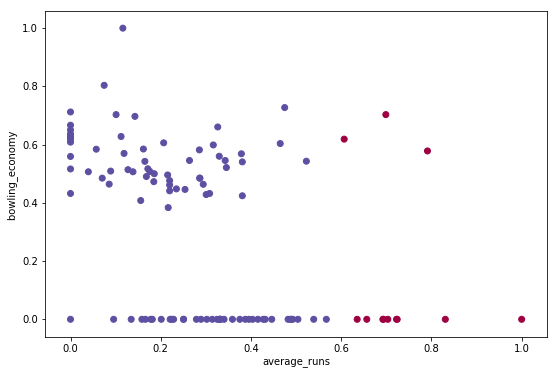

In [63]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel("average_runs")
plt.ylabel('bowling_economy ');
plt.savefig('initial_clusters', bpi=150)

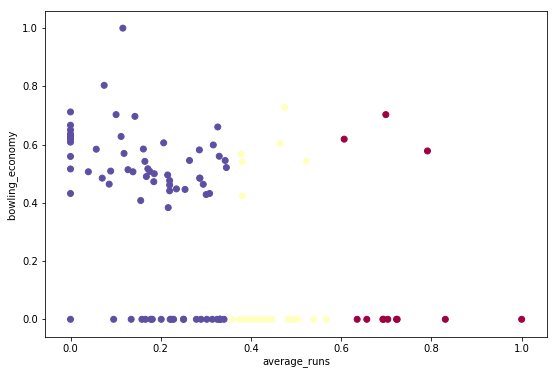

In [65]:
k = 3
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
#print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    #print(i+1, round(cluster_var))

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel("average_runs")
plt.ylabel('bowling_economy ');
plt.savefig('initial_clusters', bpi=150)

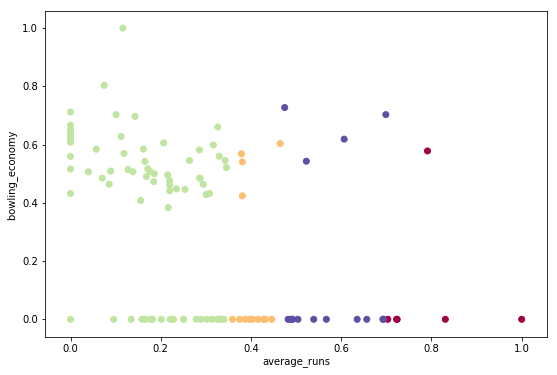

In [66]:
k = 4
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
#print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    #print(i+1, round(cluster_var))

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel("average_runs")
plt.ylabel('bowling_economy ');
plt.savefig('initial_clusters', bpi=150)

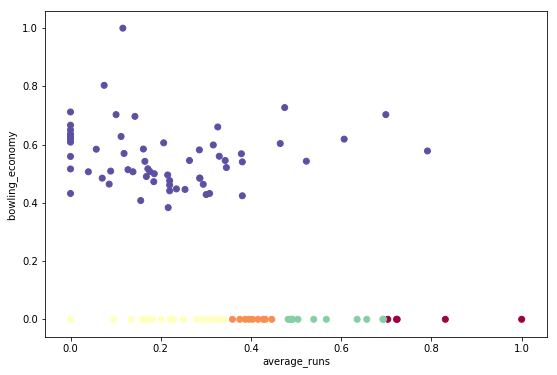

In [67]:
k = 5
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
#print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    #print(i+1, round(cluster_var))

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel("average_runs")
plt.ylabel('bowling_economy ');
plt.savefig('initial_clusters', bpi=150)